# Initialiazation Packages

In [1]:
using LinearAlgebra
using PyPlot
using PyCall
using LaTeXStrings
using QuantumToolbox
using DelimitedFiles, NLsolve
using Random, Distributions, Dates, Polynomials, StatsBase 
using JLD

In [2]:
#using Pkg
#Pkg.activate("..")

include("../src/Classical_2KPOs_functions.jl")
using .Classical_KPOs

## Lyapunov exponent of the classical trajectories

In [3]:
#KPOs parameters
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ = 0., 1., 0., 5., 0., 1., 0., 5., 1.0;
println("KPOs parameters: ", p)
min_ics = 10

KPOs parameters: (0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 5.0, 1.0)


10

Generating ICs from Closed system sweeping Energy

In [8]:
E = 10.0
ICs = Classical_KPOs.Initial_conditions(E, p, -13., 13., min_ics=min_ics)
println("Initial conditions with Energy $(E)")
display(ICs[1:10])
for i in 1:length(ICs)
    println(Classical_KPOs.H_class(ICs[i], p))
end

Initial conditions with Energy 10.0


10-element Vector{Vector{Float64}}:
 [3.092685945194077, 0.18473385897180172, -1.2639385584843126, -2.2990463845672977]
 [3.092685945194077, 0.18473385897180172, -1.2639385584843126, 2.320865058504063]
 [2.4962193634341467, 0.911844906447353, -1.908749326589902, -2.0422236002065226]
 [2.4962193634341467, 0.911844906447353, -1.908749326589902, 2.1433950605756165]
 [-4.078607059723684, -1.3320182329117944, 0.9468028647021214, -0.24216840845637527]
 [-4.078607059723684, -1.3320182329117944, 0.9468028647021214, -0.001662364949186693]
 [-1.5336139543733225, 1.4081763929208613, -0.35348047001852123, -1.1192353380804179]
 [-1.5336139543733225, 1.4081763929208613, -0.35348047001852123, 1.3604300478777465]
 [-1.4242160727081696, -0.04722361725610824, 1.3291882948918268, -1.9289181042724097]
 [-1.4242160727081696, -0.04722361725610824, 1.3291882948918268, 1.9228151716549635]

10.000000000000025
10.00000000000003
10.000000000000021
10.000000000000089
10.0
10.0
10.0
9.99999999999999
10.000000000000004
9.999999999999995


## Calcualting the Lyapunov Exponent for the ICs for the closed system

In [9]:
N = Int(2e5) #number of time steps for the Lyapunov calculation
Δt = 1e-3 #smallest time inteval for the Lapunov calculation
err= 1e-3 #tolerance for the Lyapunov calculation
λs = zeros(length(ICs))

for i in 1:length(ICs)
    λ_max, λ_t = Lyapunov_max(ICs[i], p, N, Δt, err)
    println("Lyapunov exponent for IC $(i): $(λ_max)")
    λs[i] = λ_max
end

Lyapunov exponent for IC 1: 0.0758896331684483
Lyapunov exponent for IC 2: 0.04927632631875011
Lyapunov exponent for IC 3: 2.2948775331380826
Lyapunov exponent for IC 4: 0.10555425256437831
Lyapunov exponent for IC 5: 2.1344172068269107
Lyapunov exponent for IC 6: 1.9545541575113663
Lyapunov exponent for IC 7: 2.305051443725114
Lyapunov exponent for IC 8: 2.4201395718017893
Lyapunov exponent for IC 9: 2.1457574778602666
Lyapunov exponent for IC 10: 2.555906800144656


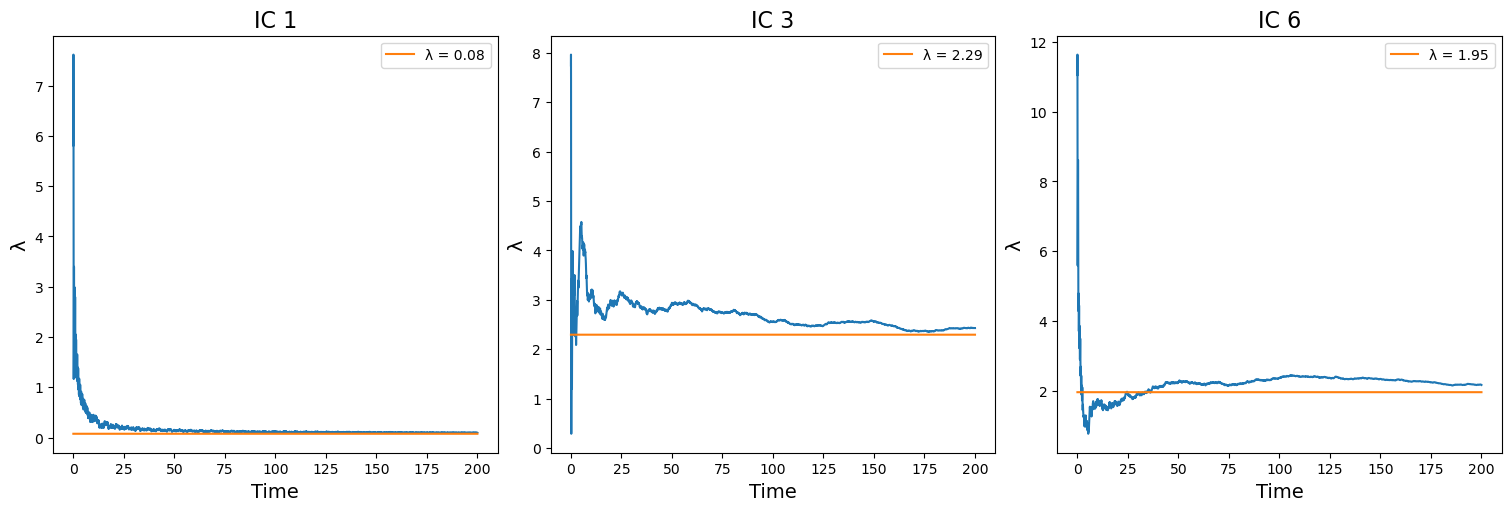

In [10]:
fig = figure(figsize=(15,5), layout= "constrained")
gs = fig.add_gridspec(1,3)
element(i,j) = get(gs, (i,j)) # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j)

ICs_sel = [1,3,6]
for i in 1:length(ICs_sel)
    ax = fig.add_subplot(element(0,i-1))
    IC_sel = ICs_sel[i]
    λ_max, λ_t = Lyapunov_max(ICs[IC_sel], p[1:9], N, Δt, err)
    plot(range(0, N*Δt, length=N), λ_t, "-")
    plot(range(0, N*Δt, length=N), range(λ_max,λ_max, length=N), "-", label="λ = $(round(λ_max, digits=2))")
    xlabel("Time", fontsize=14)
    ylabel("λ", fontsize=14)
    title("IC $(IC_sel)", fontsize=16)
    legend()
end

### Lyapunov distribution fixed E and fixed parameters

Lyapunov distribution of Kerr-cats as coupling varies

In [33]:
#KPOs parameters
Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = 0., 1., 0., 5., 0., 1., 0., 5.
println("KPOs parameters: Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = ", (Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22))
roots_,E_cl, λs, s_λs = Classical_KPOs.crit_energies((Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, 0.), 10)
E_cat = E_cl[1]
min_ics = 100
println("Kerr-cat energy: ", E_cat)
γs = [1.0, 5.0, 10.0]
println("Coupling values: ", γs)


KPOs parameters: Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = (0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 5.0)
Kerr-cat energy: -50.0
Coupling values: [1.0, 5.0, 10.0]


KPOs parameters: (0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 5.0, 1.0)
KPOs parameters: (0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 5.0, 5.0)
KPOs parameters: (0.0, 1.0, 0.0, 5.0, 0.0, 1.0, 0.0, 5.0, 10.0)


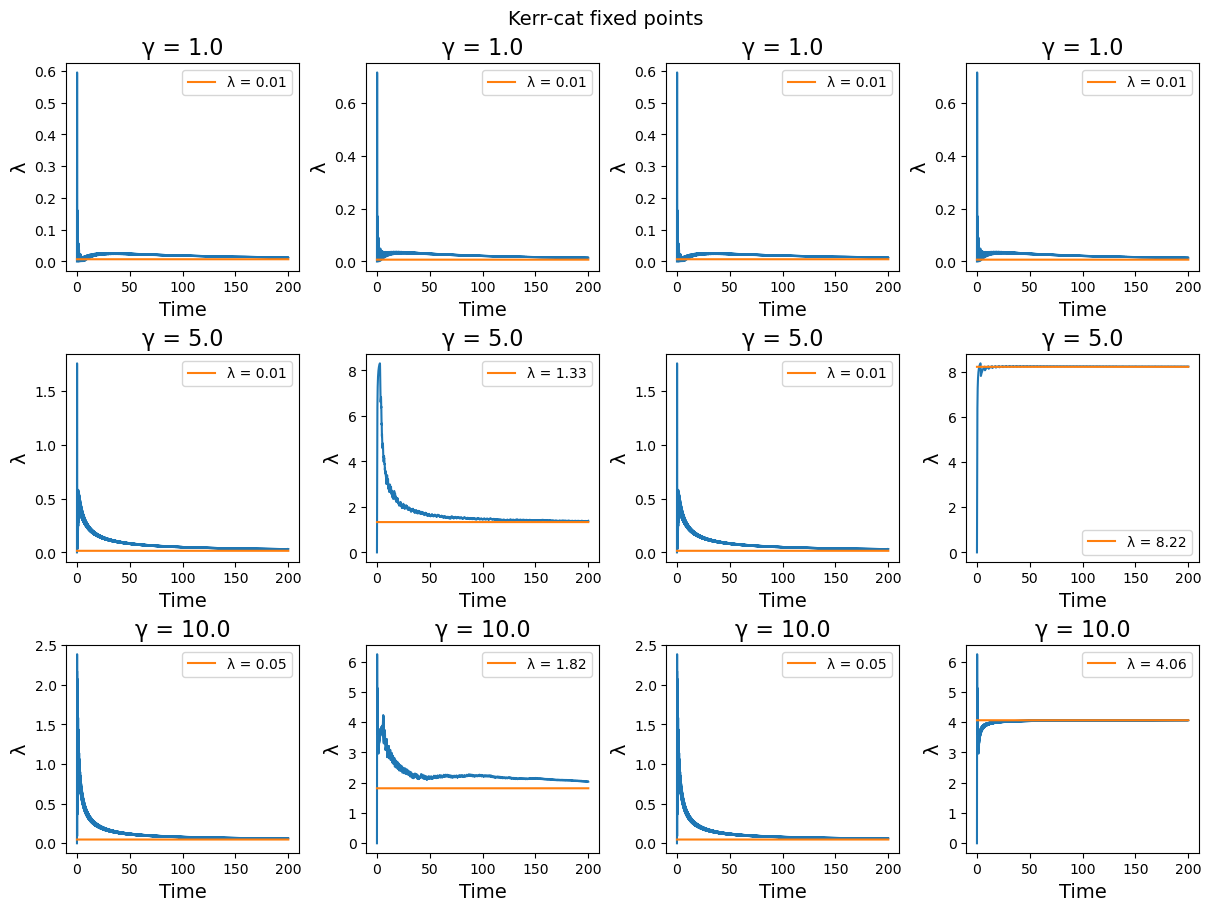

PyObject Text(0.5, 0.99537, 'Kerr-cat fixed points')

In [36]:
fig = figure(figsize=(12,9), layout= "constrained")
gs = fig.add_gridspec(3,4)
element(i,j) = get(gs, (i,j)) # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j)
N = Int(2e5) #number of time steps for the Lyapunov calculation
Δt = 1e-3 #smallest time inteval for the Lapunov calculation
err= 1e-3 #tolerance for the Lyapunov calculation

for j in 1:length(γs)
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γs[j]
    println("KPOs parameters: ", p)
    for i in 1:4
        ax = fig.add_subplot(element(j-1,i-1))
        λ_max, λ_t = Lyapunov_max(roots_[i], p, N, Δt, err)
        plot(range(0, N*Δt, length=N), λ_t, "-")
        plot(range(0, N*Δt, length=N), range(λ_max,λ_max, length=N), "-", label="λ = $(round(λ_max, digits=2))")
        xlabel("Time", fontsize=14)
        ylabel("λ", fontsize=14)
        title("γ = $(p[9])", fontsize=16)
        legend()
    end
end
fig.suptitle("Kerr-cat fixed points",fontsize=14)

In [37]:
λs = [zeros(1) for i in 1:length(γs)]
for j in 1:length(γs)
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γs[j]
    ICs = Classical_KPOs.Initial_conditions(E_cat, p, -13., 13., min_ics=min_ics)
    λ = zeros(length(ICs))

    for i in 1:length(ICs)
        λ_max, λ_t = Lyapunov_max(ICs[i], p, N, Δt, err)
        #println("Lyapunov exponent for IC $(i): $(λ_max)")
        λ[i] = λ_max
    end
    λs[j] = λ
end

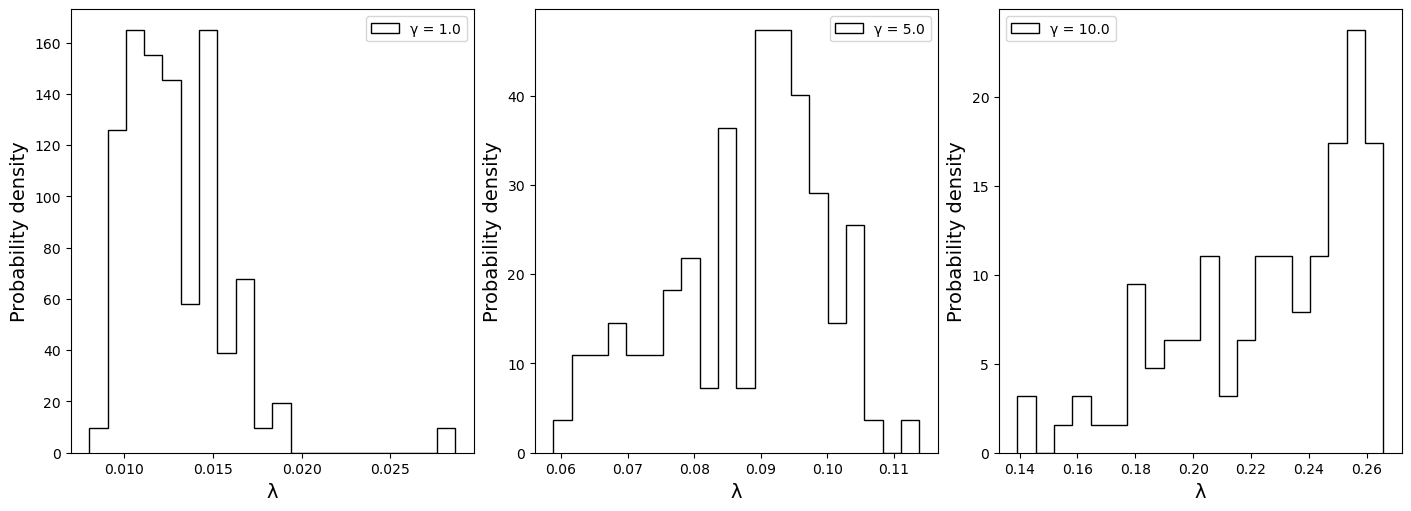

In [38]:
fig = figure(figsize=(14,5), layout= "constrained")
gs = fig.add_gridspec(1,3)
element(i,j) = get(gs, (i,j)) # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j)
#bins = range(0, 4; length=80)

for i in 1:length(γs)
    ax = fig.add_subplot(element(0,i-1))
    counts, bins, patches = hist(λs[i], bins=20, density=true, histtype="step", color="black", label="γ = $(γs[i])")
    xlabel("λ", fontsize=14)
    ylabel("Probability density", fontsize=14)
    legend()
    #title("Lyapunov exponent distribution for Kerr-cat energy", fontsize=16)
end

### HPC results

In [11]:
function Cluster_visualizationγ(j)
    k = j
    Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = 0., 1., 0., 5., 0., 1., 0., 5.
    ns_job = [1, 50, 101]
    λs_p = [[Float64[]] for i in 1:3]
    λmean_p = [Float64[] for i in 1:3]
    Energies = [Float64[] for i in 1:3]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];
    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 100
    Es = range(cE[1],0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")[" λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")[" λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .- cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    Es = range(0.,500.0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .-  cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    #xlim(0,200)
    
    #savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov/Lyapunov_γ_$(ps[j]).png")
    #close()
end

Cluster_visualizationγ (generic function with 1 method)

In [12]:
function Cluster_visualizationγ2(j)
    k = j
    Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22 = 0., 1., 0., 5., 0., 1., 0., 5.
    ns_job = [1, 50, 101]
    λs_p = [[Float64[]] for i in 1:3]
    λmean_p = [Float64[] for i in 1:3]
    Energies = [Float64[] for i in 1:3]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];
    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 100
    Es = range(cE[1],0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .- cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    Es = range(0.,500.0, length=n_E)
    Energies[j] = Es
    #Es = range(-20,20, length=n_E)
    job = 1
    λs = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][1:49];
    λ_mean2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][1:49];
    job = 2
    λs2 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λs"][50:100];
    λ_mean22 = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Mean_Lyapunov_Energies_$(p)_E_$(round(Es[1], digits=3))_$(round(Es[end], digits=3))_$(ns_job[job])_$(ns_job[job+1])_ICs_100.jld")["λ_mean2"][50:100];
    λs = vcat(λs, λs2)
    λ_mean2 = vcat(λ_mean2, λ_mean22)
    λs_p[j] = λs 
    λmean_p[j] = λ_mean2
    #Energies[k] = Energies[k] .-  cE[1]
    plot(Energies[k], λmean_p[k], "-", color="blue", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs_p[k])
        scatter(range(Energies[k][i], Energies[k][i], length=length(λs_p[k][i])), λs_p[k][i], color="black", alpha=0.5,s=1);
    end
    #xlim(0,200)
    
    #savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov/Lyapunov_γ_$(ps[j]).png")
    #close()
end

Cluster_visualizationγ2 (generic function with 1 method)

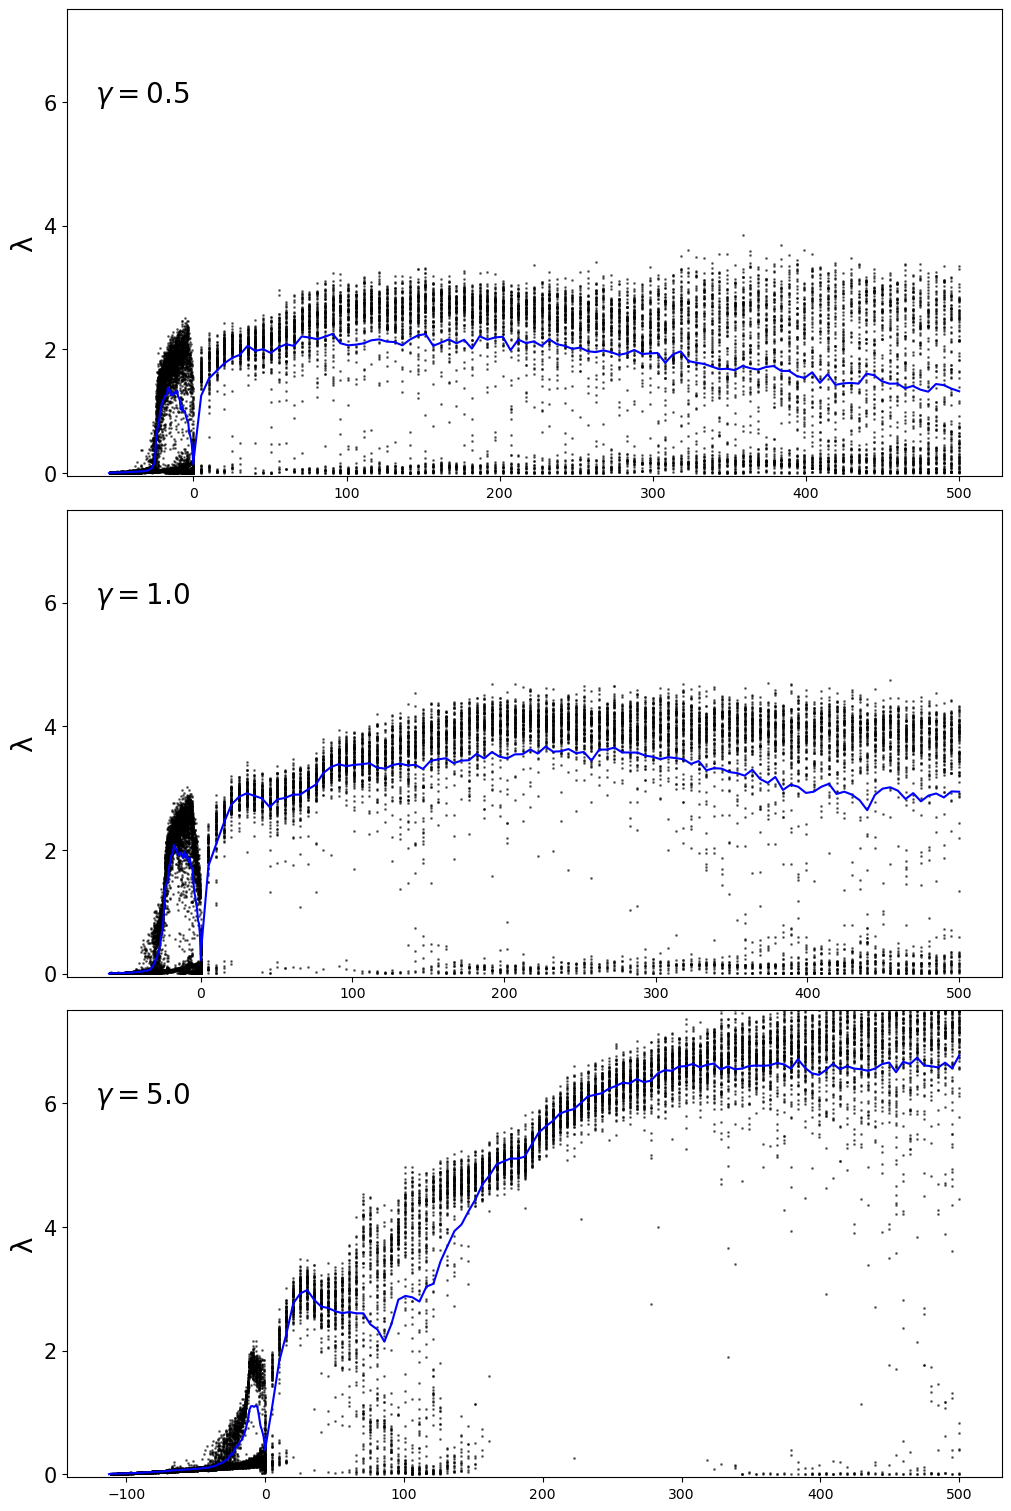

In [13]:
fig = figure(figsize=(10,15), layout="constrained");
gs = fig.add_gridspec(3,1);
element(i,j) = get(gs, (i,j)) # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j)
ps = [0.5, 1., 5.]
for k in 1:3
    ax = fig.add_subplot(element(k-1,0))
    Cluster_visualizationγ(k)
    #if k ==3
    #    xlabel("E", fontsize = 20)
        #xticks([-120, -80, -40, 0], fontsize=15)
    #else
    #    xticks([])
    #end
    ax.text(.03, 0.85, L"γ = %$(ps[k])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    ylabel("λ", fontsize = 20)
    yticks([0, 2, 4,6], fontsize=15)
    #xlim(0, 3000)
    ylim(-.05, 7.5)
end
#savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov_E_γ_big2.png")

## Quantum Classical 

-51.005
γ = 0.1
data_miss = Any[]
-60.5
γ = 1.0
data_miss = Any[]
-112.5
γ = 5.0
data_miss = Any[]


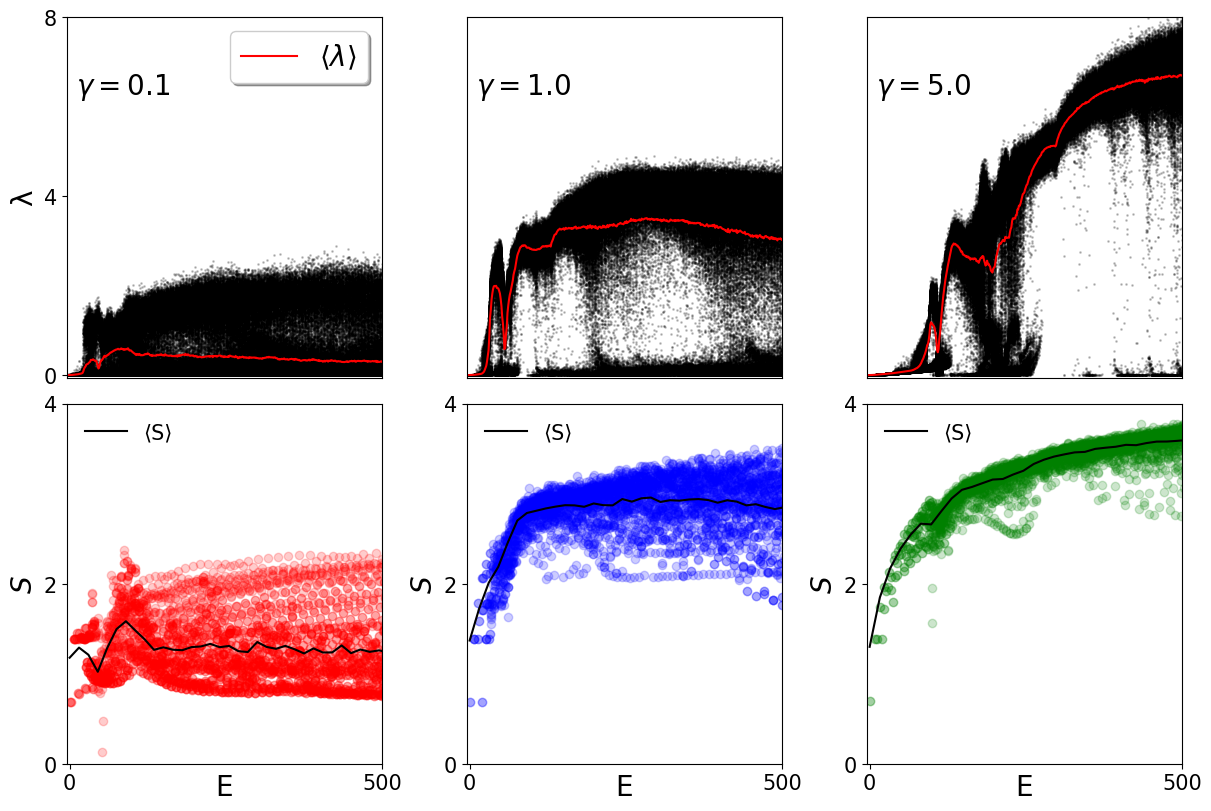

In [14]:
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ = 0., 1., 0., 5., 0., 1., 0., 5., 1.
ICs= 1000
Neff= 3


fig = figure(figsize=(12,8), layout="constrained");
gs = fig.add_gridspec(2,3); 
element(i,j) = get(gs, (i,j)); # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j);
xx_lim = 500

for j in 1:3
    ax = fig.add_subplot(element(0,j-1))
    ps = [0.1, 1.,5.]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];  

    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 500
    Es1 = range(cE[1],600+cE[1], length=n_E)
    println( cE[1] )
    Energies = Es1 .- cE[1] 
    λs = [Float64[] for i in 1:n_E]
    λ_mean = zeros(n_E)
    data_miss= []
    for job in 1:100
        try
            λ_mean[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Mean_Lyapunov_Energies_$(p)_job_$(job)__ICs_$(ICs).jld")["λ_mean"][(5*(job-1) + 1):5*job]
            λs[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Lyapunov_Energies_$(p)_job_$(job)_ICs_$(ICs).jld")["λs"][(5*(job-1) + 1):5*job]
        catch
            #println("Missing job $(job)")
            push!(data_miss, job)
        end    
    end
    println("γ = $(ps[j])")
    println("data_miss = $(data_miss)")
    #println(length(data_miss))

    #pltos
    plot(Energies, λ_mean, "-", color="red", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs)
        scatter(range(Energies[i], Energies[i], length=length(λs[i])), λs[i], color="black", alpha=0.2,s=1);
    end
    ax.text(.03, 0.85, L"γ = %$(ps[j])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    if j ==1
        legend(fontsize=20, shadow=true, loc = "upper right");
    end
    xticks([])
    if j ==1
        ylabel("λ", fontsize = 20)
        yticks([0, 4, 8], fontsize=15)
        #xlim(0, 130)
        #ylim(-.05, 3.5)
    else
        yticks([])
    end
    xlim(-0.05, xx_lim)
    ylim(-.05, 8.0)

    ax = fig.add_subplot(element(1,j-1))
    colors_ = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "olive", "cyan"];
    markers_ = ["o", "v", "s", "D", "^", "<", ">", "p", "*", "h"];
                            
    
    Entropies = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/data/Entropy/Entropy_p_$(p)_Neff_$(Neff).jld")["Entropies"]
    E = (load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/data/Entropy/Energies_p_$(p)_Neff_$(Neff).jld")["E"]) ./ Neff^2
    mean_S = Float64[]
    div_len = 40
    intv_E =  range(minimum(E),maximum(E)+1,length=div_len)
    for i in 1: (div_len-1)
        index = findall(x -> x >= intv_E[i] && x < intv_E[i+1], E)
        push!(mean_S, mean(Entropies[index]))
    end

    plot(E .- E[1], Entropies, "o", color=colors_[j], alpha = 0.2)
    plot(intv_E[1:end-1] .- E[1] , mean_S, color="black", label="⟨S⟩")
    xlim(-5, xx_lim)
    legend(frameon=false,fontsize=15, shadow=true, loc = "upper left")
    ylim(0.3,4)
    ylabel(L"S", fontsize=20)
    xlabel("E", fontsize=20,labelpad=-15)
    xticks([0,xx_lim],fontsize=15)
    yticks([0,2,4],fontsize=15)
    
end
#savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov_Energy.png")


In [ ]:
p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, γ = 0., 1., 0., 5., 0., 1., 0., 5., 1.
ICs= 1000

fig = figure(figsize=(6,5), layout="constrained");
gs = fig.add_gridspec(1,1); 
element(i,j) = get(gs, (i,j)); # starts at 0 to N-1
slice(i,j) = pycall(pybuiltin("slice"), PyObject, i,j);
xx_lim = 500

for j in 1:1
    ax = fig.add_subplot(element(0,j-1))
    ps = [1.]
    p = Δ1, K1, ξ11, ξ21, Δ2, K2, ξ12, ξ22, ps[j];  

    roots, cE, λs_p31, s_λ = crit_energies(p,7);
    n_E = 500
    Es1 = range(cE[1],600+cE[1], length=n_E)
    println( cE[1] )
    Energies = Es1 .- cE[1] 
    λs = [Float64[] for i in 1:n_E]
    λ_mean = zeros(n_E)
    data_miss= []
    for job in 1:100
        try
            λ_mean[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Mean_Lyapunov_Energies_$(p)_job_$(job)__ICs_$(ICs).jld")["λ_mean"][(5*(job-1) + 1):5*job]
            λs[(5*(job-1) + 1):5*job] = load("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/data/Lyapunov/Lyapunov_Energies_$(p)_job_$(job)_ICs_$(ICs).jld")["λs"][(5*(job-1) + 1):5*job]
        catch
            #println("Missing job $(job)")
            push!(data_miss, job)
        end    
    end
    println("γ = $(ps[j])")
    println("data_miss = $(data_miss)")
    #println(length(data_miss))

    #pltos
    plot(Energies, λ_mean, "-", color="red", markersize=5, label = L"⟨λ⟩");
    for i in 1:length(λs)
        scatter(range(Energies[i], Energies[i], length=length(λs[i])), λs[i], color="black", alpha=0.2,s=1);
    end
    ax.text(.03, 0.85, L"γ = %$(ps[j])", transform=ax.transAxes, fontsize=20, verticalalignment="top")
    if j ==1
        legend(fontsize=20, shadow=true, loc = "upper right");
    end
    if j ==1
        ylabel("λ", fontsize = 20)
        #yticks([0, 4, 8], fontsize=15)
        #xlim(0, 130)
        #ylim(-.05, 3.5)
    else
        yticks([])
    end
    xlim(-0.05, xx_lim)
    ylim(-.05, 8.0)

    xlim(-5, xx_lim)
    xlabel("E", fontsize=20,labelpad=-15)
    #xticks([0,xx_lim],fontsize=15)
    
end
#savefig("C:/Users/edson/Desktop/Research/Kerr_system/Coupled_kerr/codes_Chemistry/Classical_Kerr/Figures/Lyapunov_Energy.png")
